# 출처 : [Kaggle 2020] Visualization & Analysis
### https://www.kaggle.com/subinium/kaggle-2020-visualization-analysis/notebook

## Visualization & Analysis

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches #그래프에 다양한 2D 도형을 표현하기 위한 클래스를 포함
import matplotlib.gridspec as gridspec

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings

warnings.filterwarnings(action = 'ignore')
plt.rcParams['figure.dpi'] = 200 #high resolution

In [148]:
data = pd.read_csv(r"./dataset/kaggle_survey_2020_responses.csv")
data

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [149]:
question = data.iloc[0].T
data = data.drop([0])

## Q1 & Q2 Age/Gender Distribution

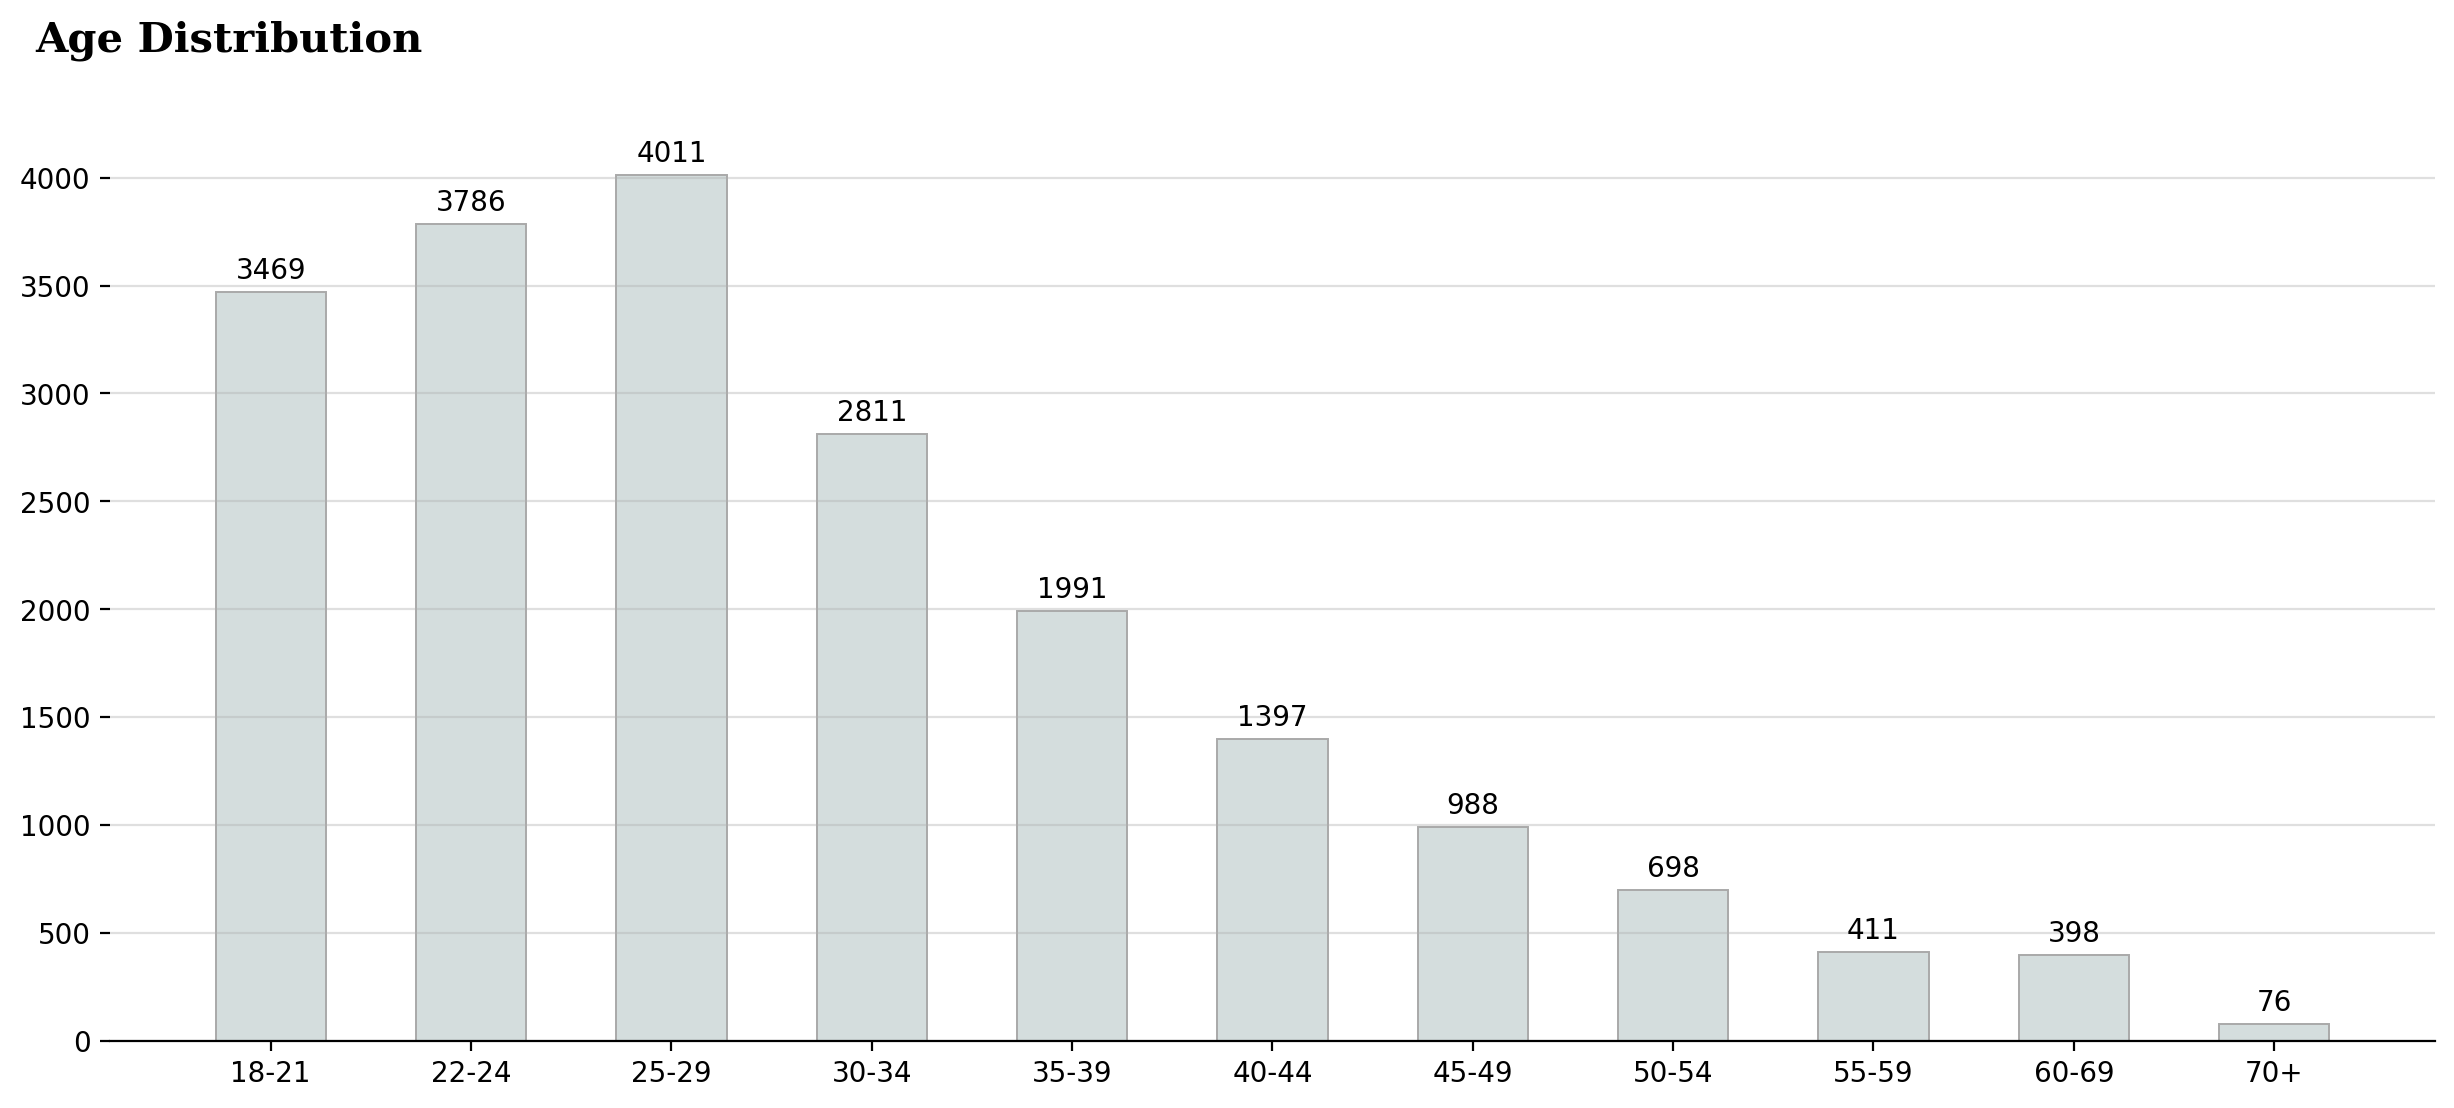

In [150]:
#Q1 analysis
fig, ax = plt.subplots(1,1,figsize = (15,6)) #그래프 개수 및 사이즈 지정
data_q1 = data.Q1.value_counts().sort_index() #Q1의 빈도수를 인덱스 순으로 정렬
ax.bar(data_q1.index, data_q1, width=0.55,
      edgecolor = 'darkgray', color = '#d4dddd',
      linewidth = 0.7)
#bar의 폭, 엣지 색상, 내부 색상, 테두리 두께 지정
for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}",
                xy = (i, data_q1[i]+100),
                va = 'center', ha = 'center', fontweight = 'light',fontfamily = 'Sans Serif')
    #xy : 글자 위치
    #va & ha : value 위치 
    #fontweight : 글자 굵기
    #fontfamily : 글꼴
    
for s in ['top','left','right']:
    ax.spines[s].set_visible(False) #그래프 테두리 속성
    
ax.set_ylim(0, 4200) #y축 축 범위 지정
ax.set_xticklabels(data_q1.index, fontfamily = 'Sans Serif') #x축 텍스트 변경
ax.set_yticklabels(np.arange(0,4001,500),fontfamily = 'Sans Serif') #y축 텍스트 변경
fig.text(0.1, 0.95, 'Age Distribution', fontsize = 15, fontweight = "bold", fontfamily = 'serif')#제목 지정
ax.grid(axis = 'y', linestyle = '-', alpha = 0.4)
plt.show()



[]

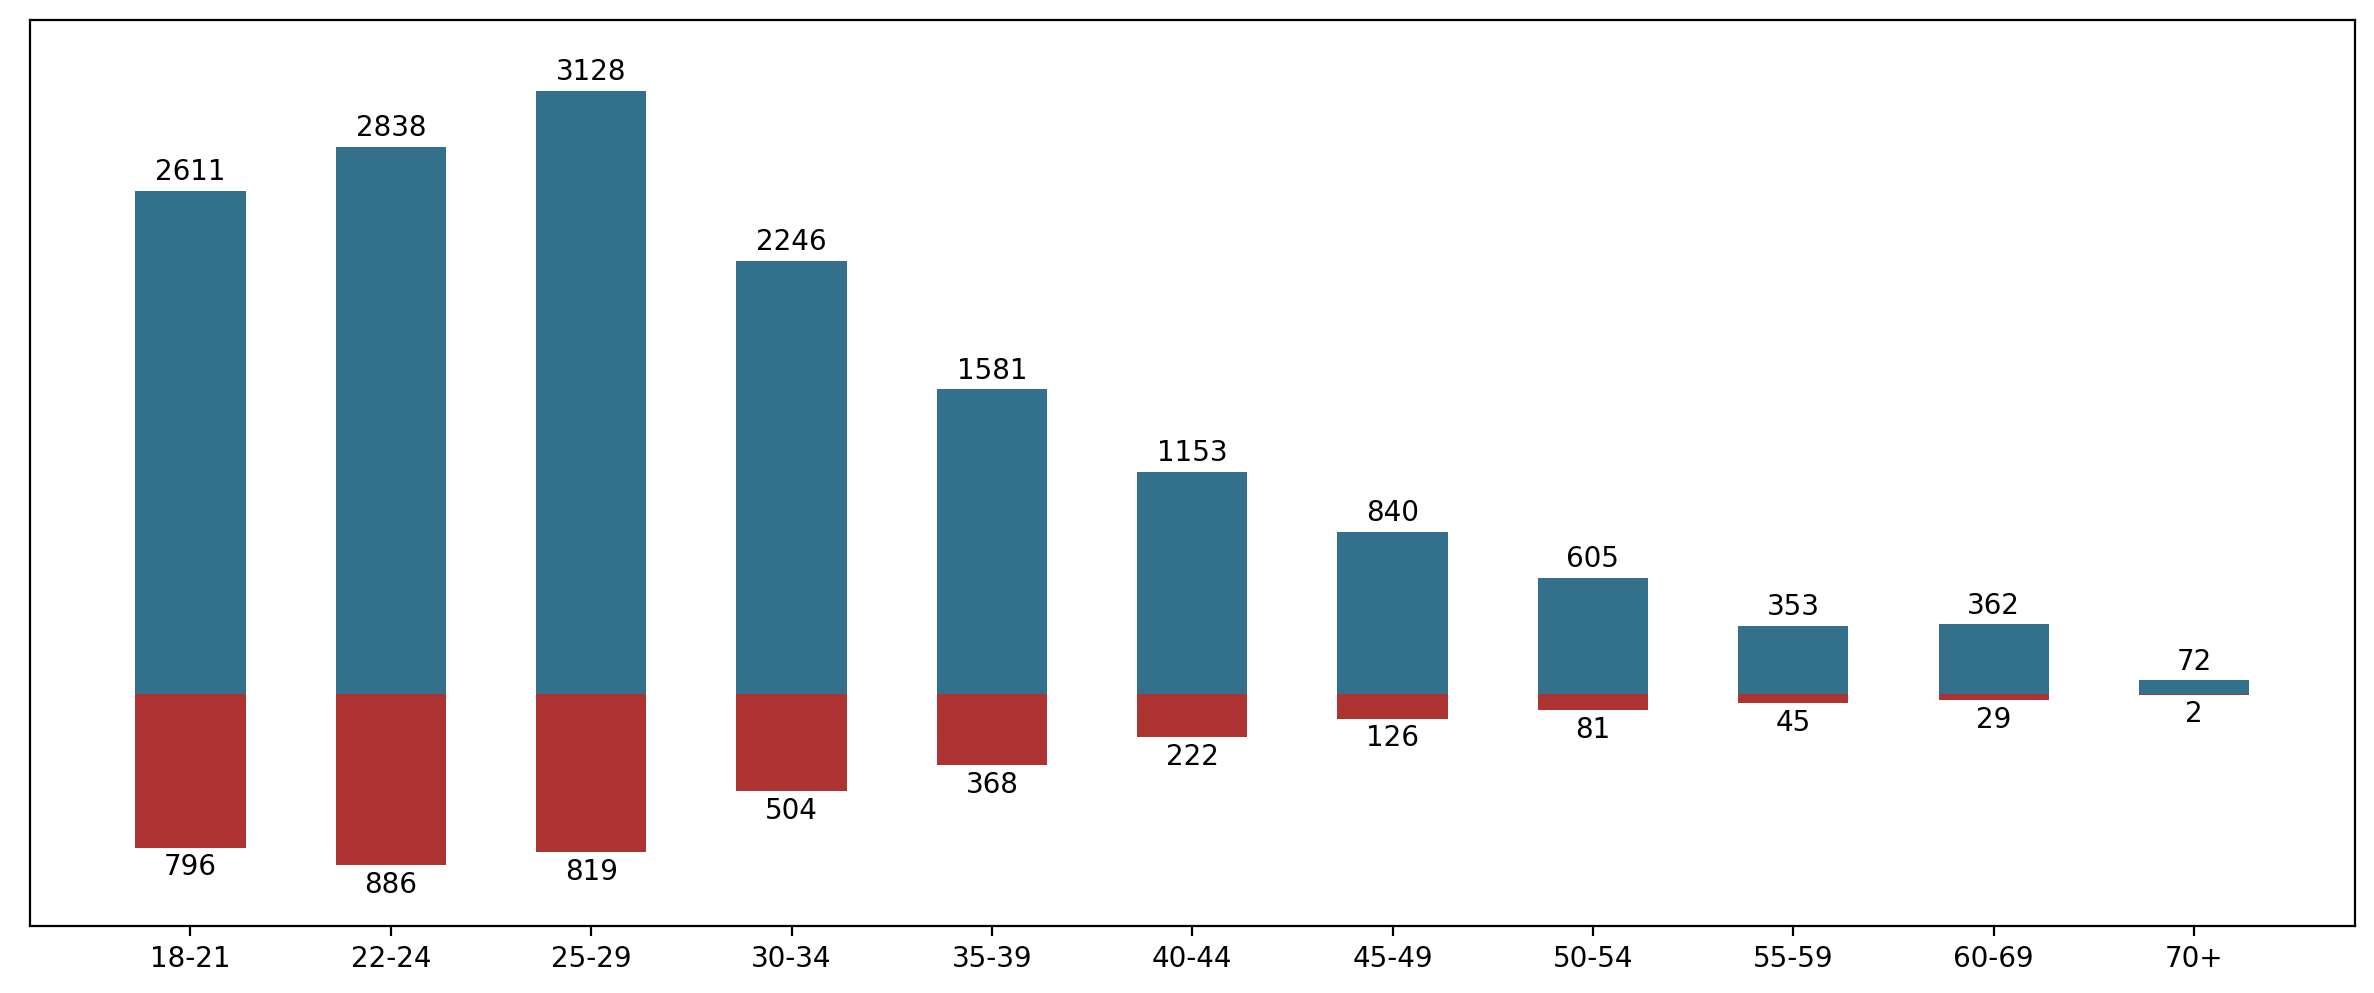

In [151]:
#Q2 analysis
data['Q2'] = data.Q2.apply(lambda x : 'etc' if x not in ['Man','Woman'] else x)
#Q2값에서 남성 혹은 여성이 아닌 경우 etc로 문자 변경
data_q1q2 = data[data.Q2 != 'etc'].groupby("Q2")["Q1"].value_counts().unstack().sort_index()
#Q2 !='etc'인 data에서 Q2로 Q1을 묶고, 정렬
man = data_q1q2.loc['Man']
woman = data_q1q2.loc['Woman']

#그래프 그리기 - 남자
fig, ax = plt.subplots(1,1, figsize = (15,6))
ax.bar(x = man.index,
       height = man,
       width = 0.55,
       color = '#004c70',
       alpha = 0.8,
       label = 'Male')
#그래프 그리기 - 여자
ax.bar(x = woman.index,
       height = -woman,
       width = 0.55,
       color = '#990000',
       alpha = 0.8,
       label = 'Female')
#y축 범위 지정
ax.set_ylim(-1200,3500)

#남성 데이터 빈도수 텍스트 입력
for i in man.index:
    ax.annotate(s = f"{man[i]}",
               xy = (i, man[i] + 100),
               va = 'center', ha = 'center', fontweight = 'light', fontfamily = 'Sans Serif',
               color = '#000000')
    
#여성 데이터 빈도수 입력
for i in woman.index:
    ax.annotate(s = f"{woman[i]}",
               xy = (i, - woman[i] - 100),
               va = 'center', ha = 'center', fontweight = 'light',fontfamily = 'Sans Serif',
               color = '#000000')
    
ax.set_xticklabels(data_q1q2.columns, fontfamily = "Sans Serif")
ax.set_yticks([])

## Q2 & Q3. Gender & Country

In [152]:
q3_order = data.Q3.value_counts()[:11].drop("Other").index
#Q3의 빈도수를 확인후 Top10 이후는 삭제

data_q2q3 = data.groupby("Q3")["Q2"].value_counts().unstack()
data_q2q3 = data_q2q3.loc[q3_order]
data_q2q3['sum'] = data_q2q3.sum(axis = 1)
# apply 함수로도 가능 data_q2q3.apply(func = np.sum, axis = 1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[["Man","Woman","etc"]]
data_q2q3_ratio = data_q2q3_ratio.rename(index = {'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})[::-1]
data_q2q3_ratio


Q2,Man,Woman,etc
Turkey,0.723837,0.252907,0.023256
Germany,0.806931,0.163366,0.029703
China,0.818565,0.145570,0.035865
Nigeria,0.823529,0.170168,0.006303
UK,0.789366,0.186094,0.024540
Russia,0.843643,0.137457,0.018900
Japan,0.924765,0.065831,0.009404
Brazil,0.863112,0.134006,0.002882
USA,0.751006,0.215914,0.033080
India,0.767561,0.220304,0.012135


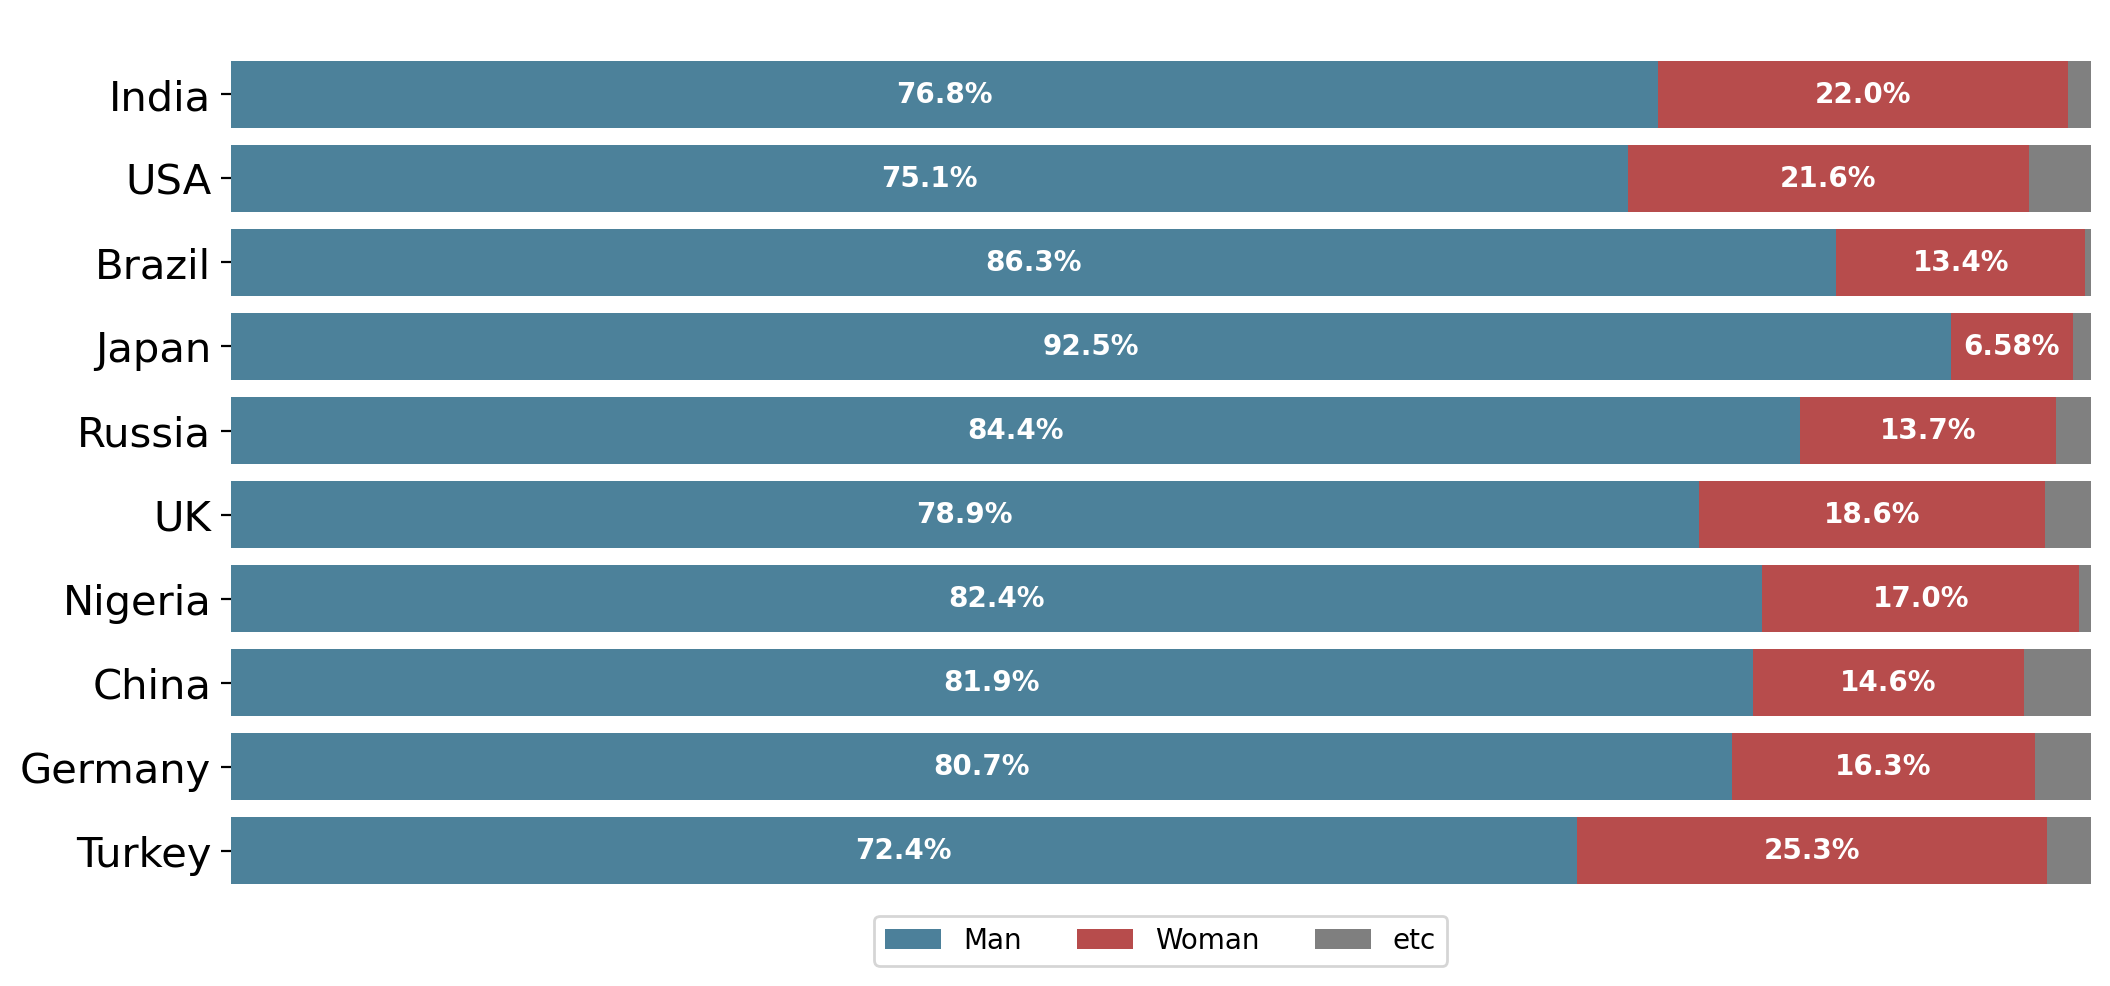

In [153]:
fig,ax = plt.subplots(1,1, figsize = (12,6))


ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'],
       color = "#004c70",alpha = 0.7, label = "Man")
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'],
       color = "#990000", alpha = 0.7, label = "Woman",
        left = data_q2q3_ratio["Man"])
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['etc'],
       color = "#4a4a4a", alpha = 0.7, label = "etc",
        left = data_q2q3_ratio["Man"]+data_q2q3_ratio["Woman"])

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily = "Sans Serif", fontsize = 15)

#male & female Percentage
for i in data_q2q3_ratio.index:
    ax.annotate(s = f"{data_q2q3_ratio.Man[i]*100:.3}%",
                xy = (data_q2q3_ratio.Man[i]/2,i),
                va = "center", ha = "center", fontsize = 10, fontweight = 'bold', fontfamily = 'Sans Serif',
                color = 'white')
    #문자열로 반올림 사용 방법 2가지
    ##1 f"{round(값)}" or f"{값 : .3} <= 3자리 보이기"
    
for i in data_q2q3_ratio.index:
    ax.annotate(s = f"{data_q2q3_ratio.Woman[i]*100:.3}%",
                xy = (data_q2q3_ratio.Man[i]+data_q2q3_ratio.Woman[i]/2,i),
                va = "center", ha = "center", fontweight = "bold", fontsize = 10, fontfamily = "Sans Serif",
                color = 'white')
    
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc = 'lower center', ncol = 3, bbox_to_anchor = (0.5, -0.06))
plt.show()

## Q4 & Q6 Degree / Experience

In [154]:
q4_cols=['No formal education past high school',
'Some college/university study without earning a bachelor’s degree', 
'Bachelor’s degree','Master’s degree','Doctoral degree','Professional degree','I prefer not to answer']

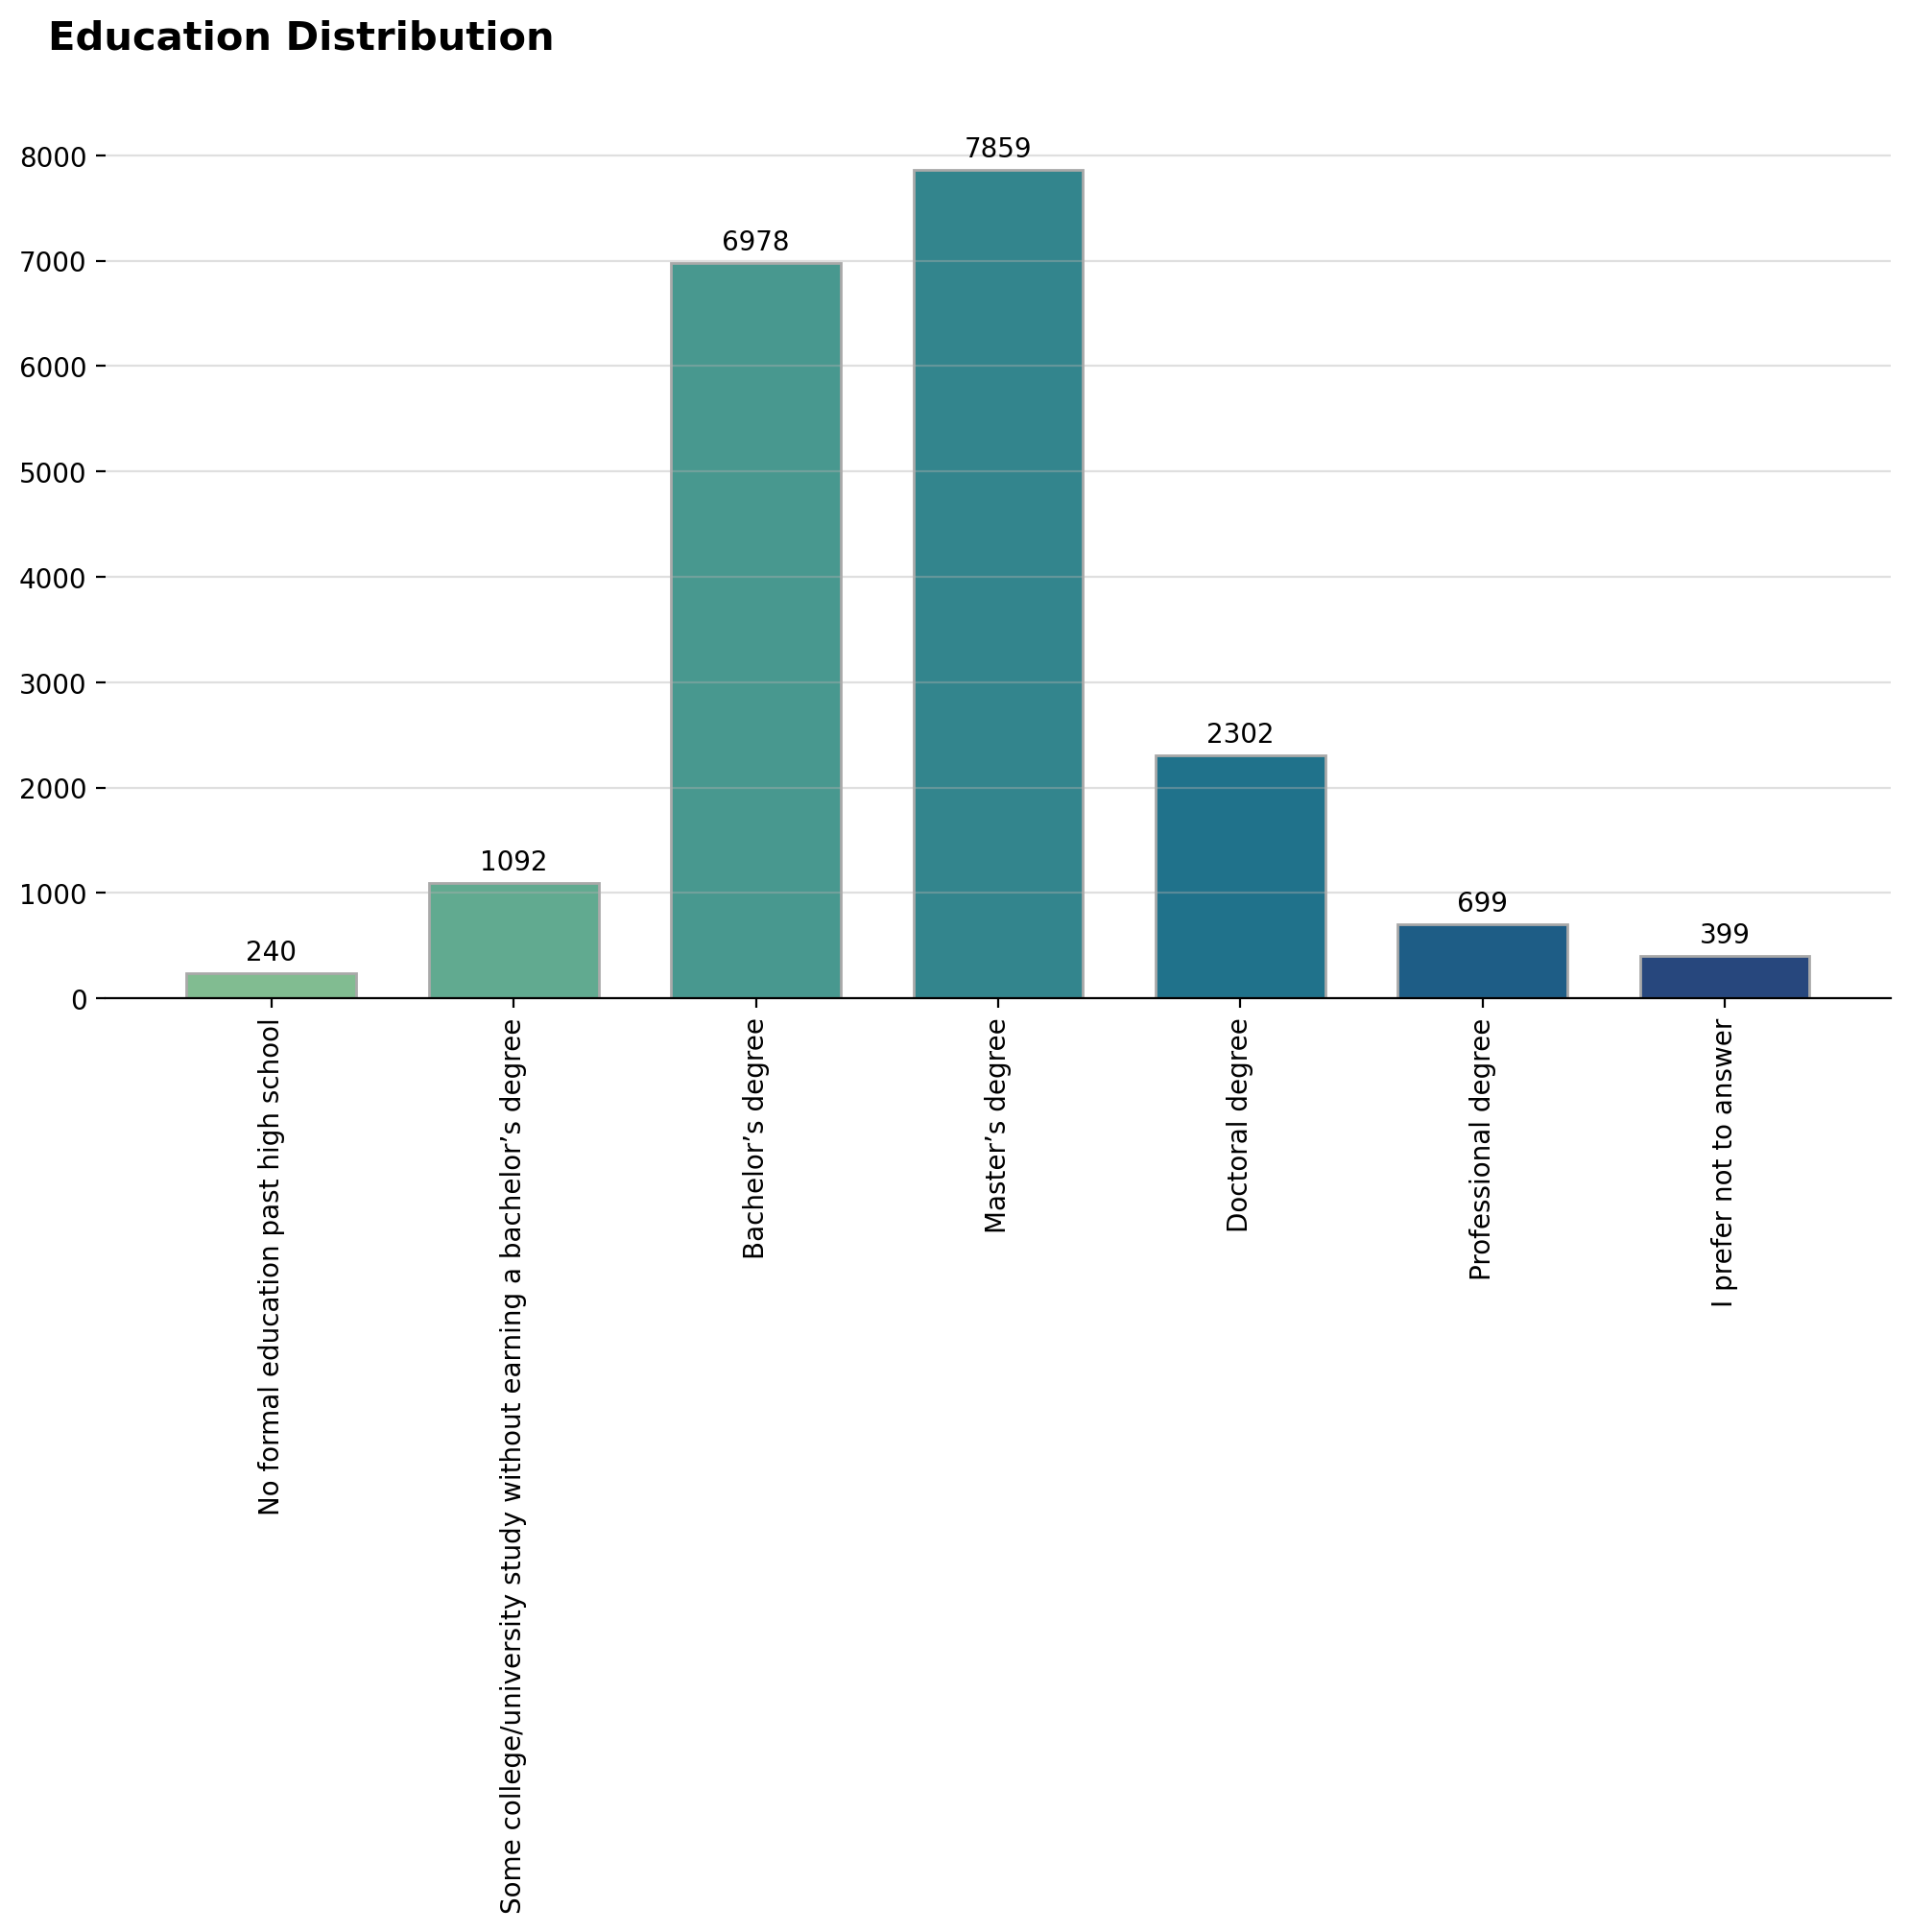

In [155]:
data_q4 = data.Q4.value_counts()[q4_cols]

fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,6))

ax.bar(data_q4.index,data_q4, width = 0.7, edgecolor = 'darkgray',
       color = sns.color_palette(palette = 'crest', n_colors = 7))

for i in data_q4.index:
    ax.annotate(s = f"{data_q4[i]}",
                xy = (i, data_q4[i]+200),
                va = 'center', ha = 'center', fontweight = 'light', fontfamily = "Sans Serif")
    
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q4.index, fontfamily = 'Sans Serif', rotation = 90)
fig.text(0.1, 0.95, 'Education Distribution', fontfamily = 'Sans Serif', fontsize = 15, fontweight = 'bold')
ax.grid(axis = 'y', alpha = 0.4, ls = '-')
plt.show()

In [156]:
data.Q6.unique()
q6_cols = ['I have never written code','< 1 years', '1-2 years',
           '3-5 years', '5-10 years', '10-20 years', '20+ years']

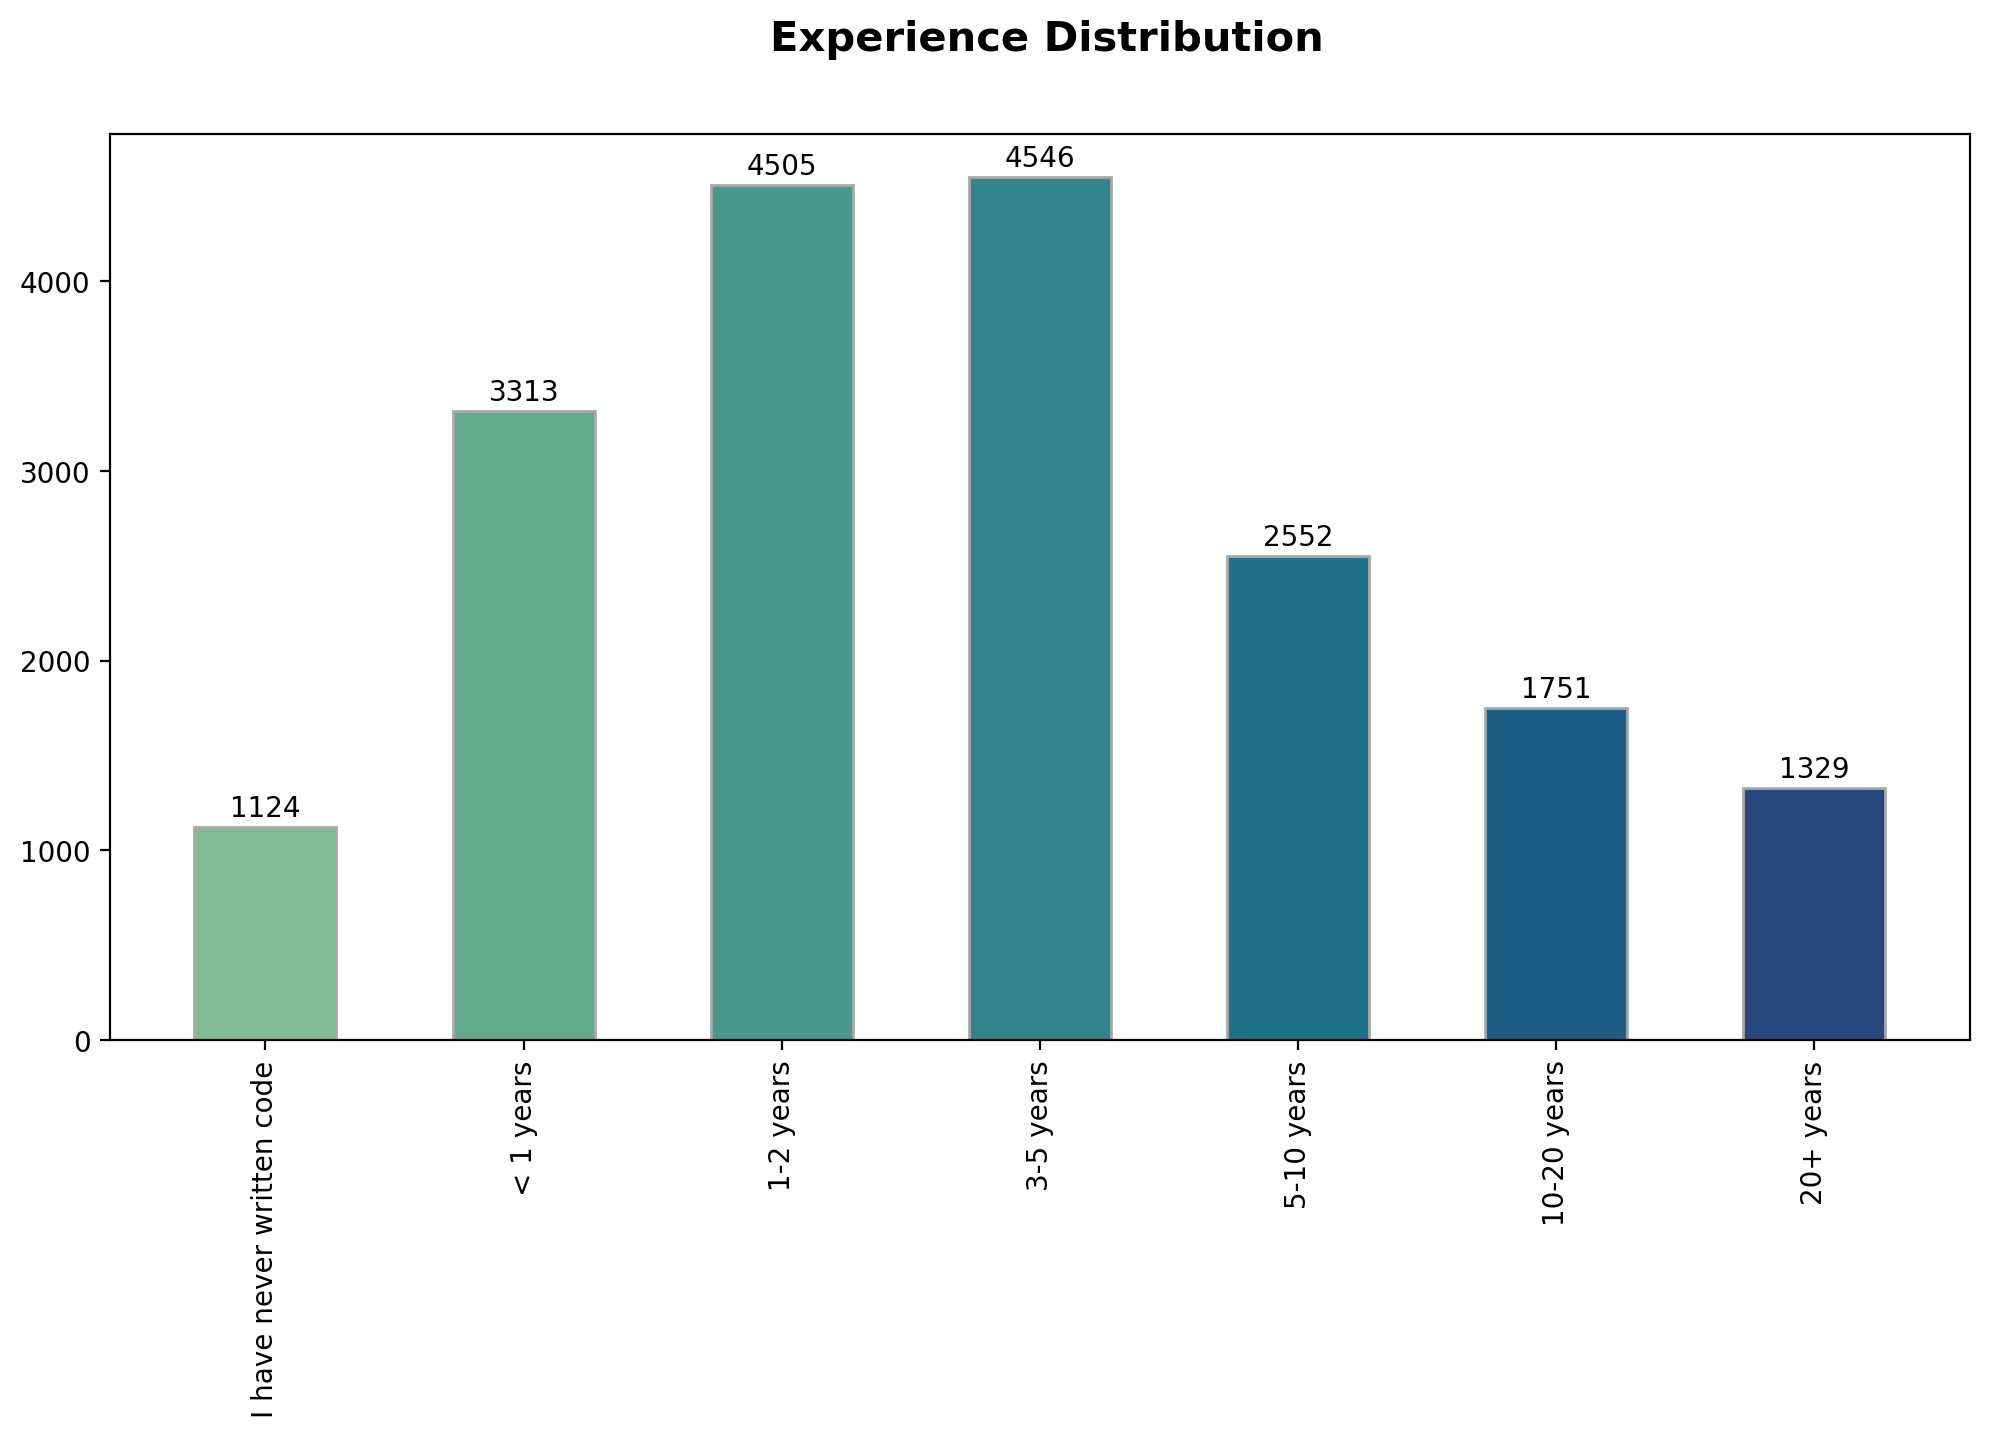

In [225]:
data_q6 = data.Q6.value_counts()[q6_cols]

fig,ax = plt.subplots(1,1, figsize = (12,6))

ax.bar(data_q6.index, data_q6,
       width = 0.55, edgecolor = "darkgray", color = sns.color_palette(palette = "crest",n_colors = 7))

for i in data_q6.index:
    ax.annotate(s = f"{data_q6[i]}",
                xy = (i, data_q6[i]+100),
                va = 'center', ha = 'center', fontfamily = 'Sans Serif', fontweight = 'light')
    
fig.text(0.4, 0.95, "Experience Distribution", fontfamily = "Sans Serif", fontsize = 15, fontweight = 'bold')
ax.set_xticklabels(data_q6.index, rotation = 90, fontfamily = 'Sans Serif')
plt.show()

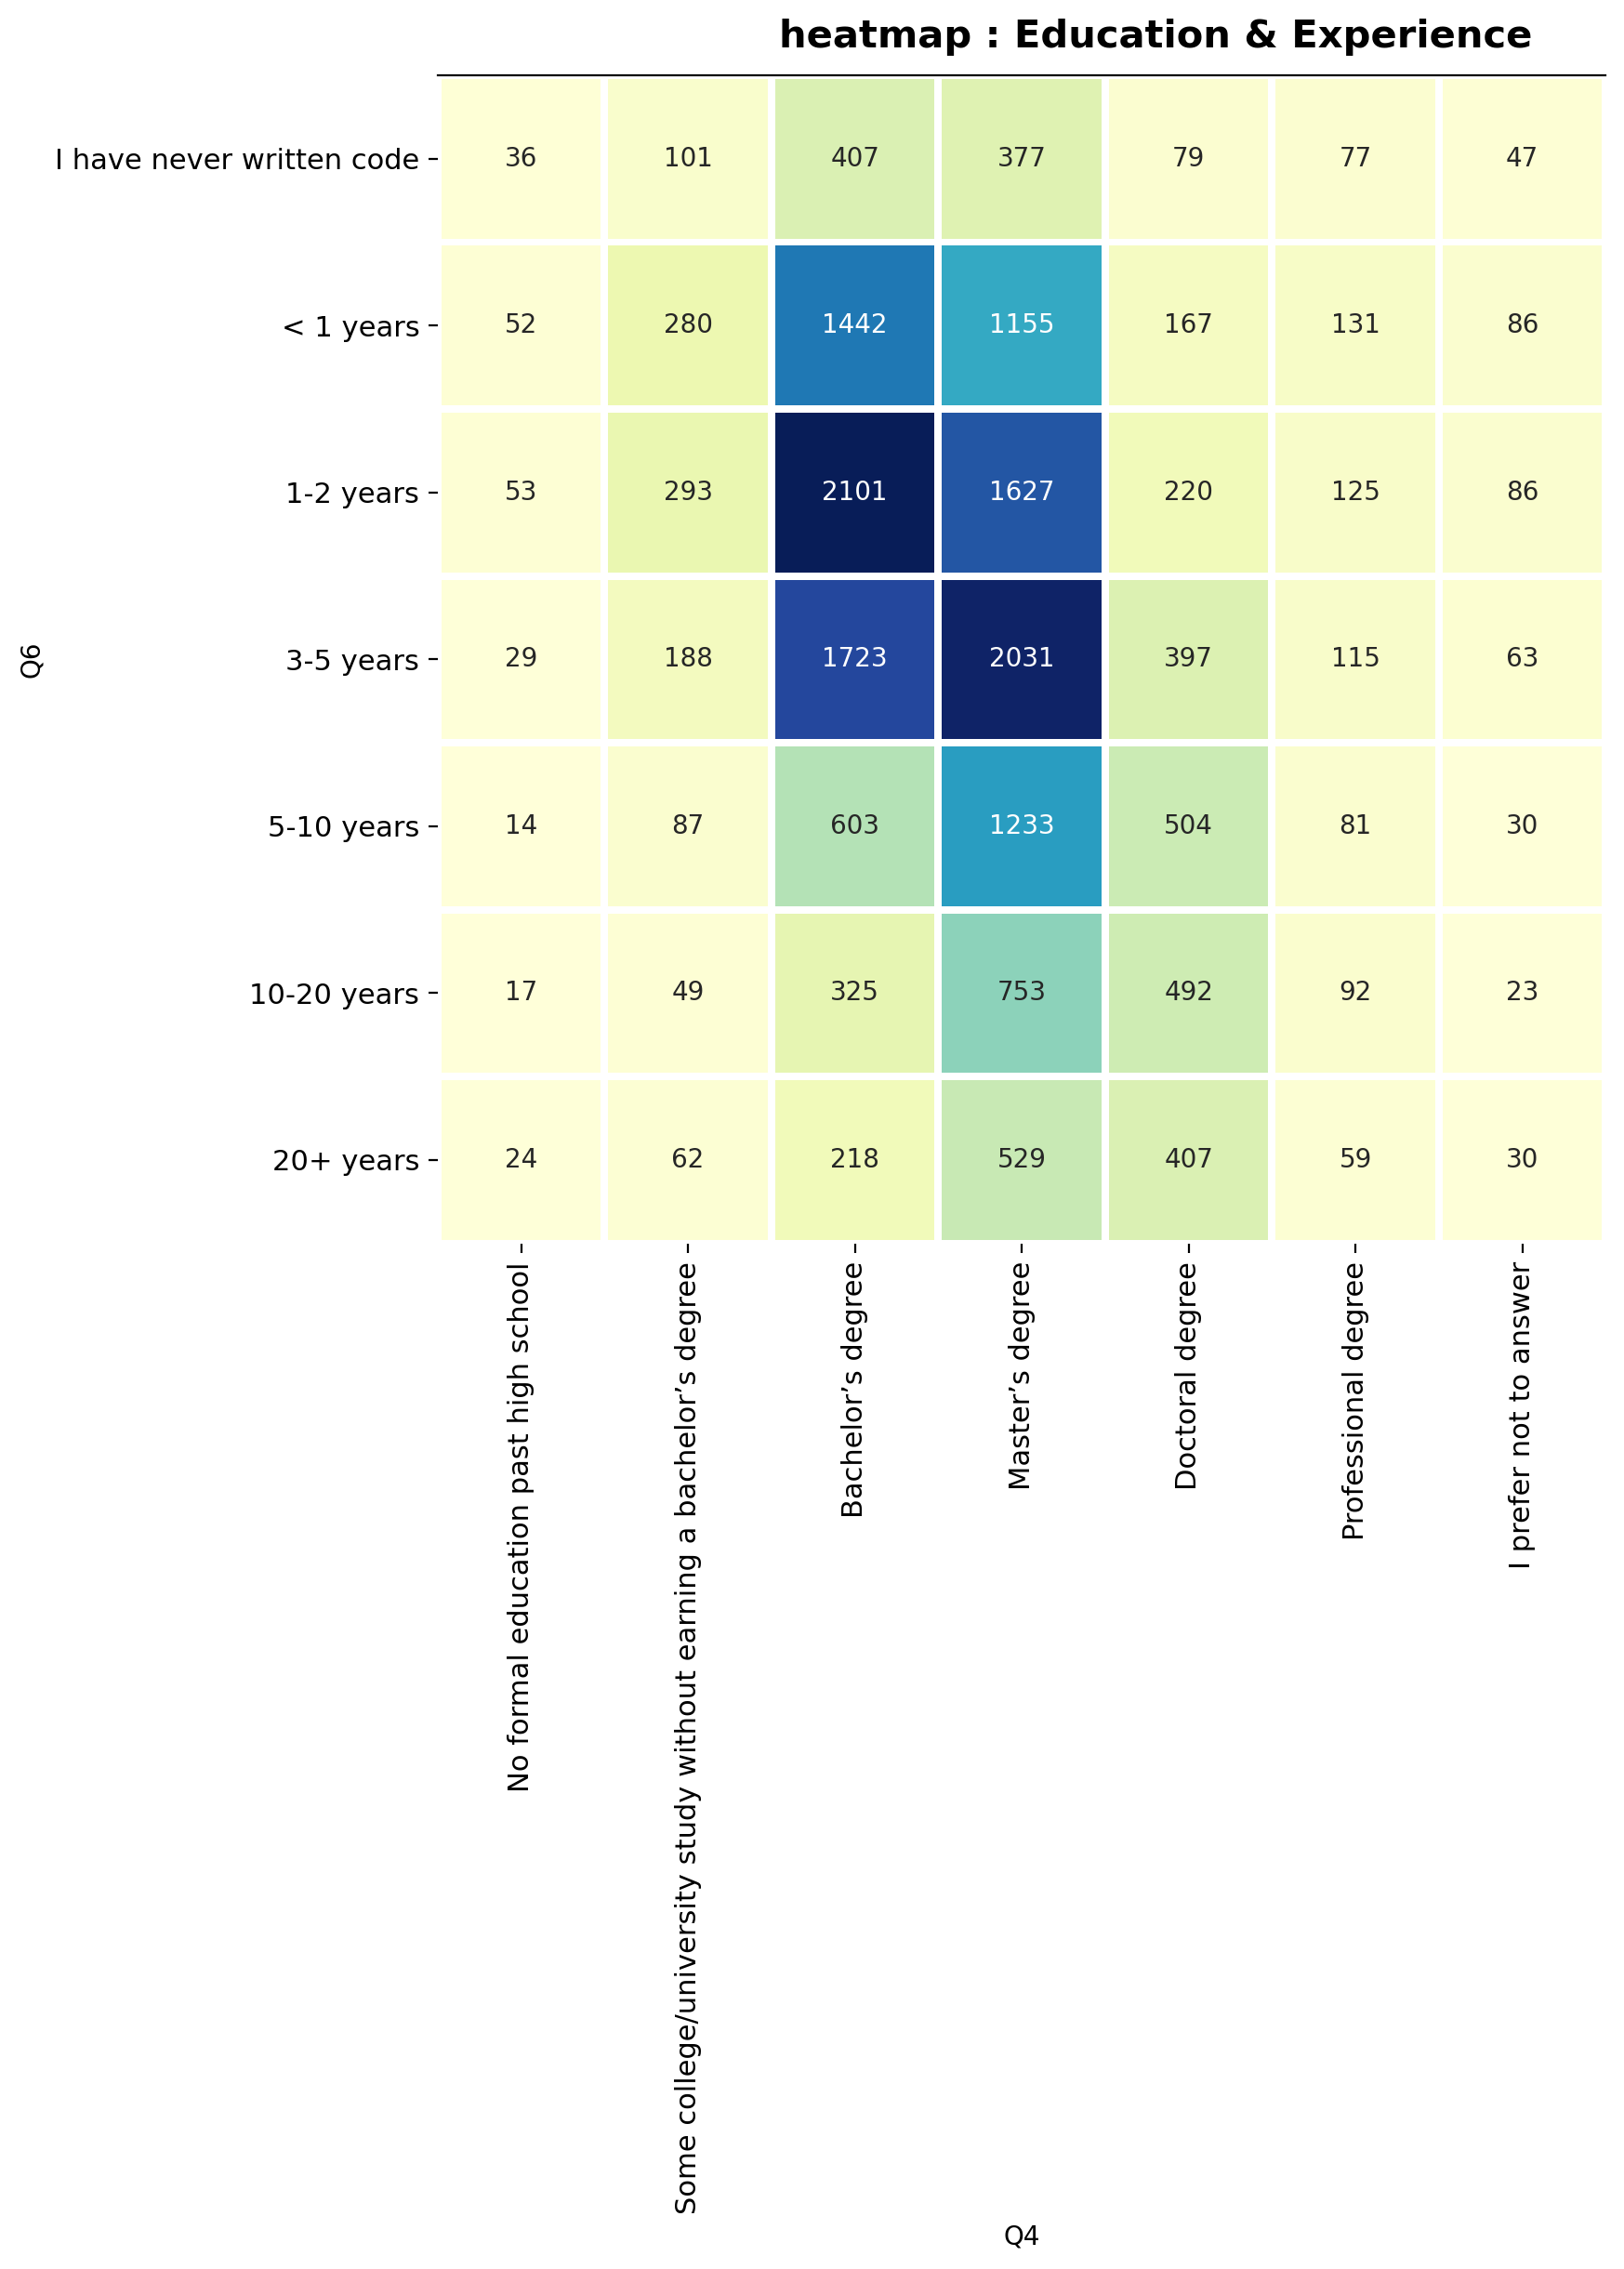

In [236]:
#Q4 & Q6 히트맵 생성을 위해 출처 코드에서는 data에 count가 1인 열을 추가하고, index는 Q6, columns = Q4를 놓은 상태로 피봇테이블 생성
# data['count'] = 1
# pd.pivot_table(data, values='count', index=['Q6'], columns=['Q4'], aggfunc=np.sum)
#groupby로도 생성 가능하므로 대체하여 사용

fig,ax = plt.subplots(1,1,figsize=(12,12))

sns.heatmap(data = data.groupby(["Q6","Q4"])["Q6"].count().unstack().loc[q6_cols,q4_cols],
            cmap = "YlGnBu",
            linewidth = 2.5,
            square = True,
            cbar = False,
            annot = True,
            fmt = 'd',
            ax=ax)

ax.spines['top'].set_visible(True)
fig.text(0.48,1, "heatmap : Education & Experience", fontsize = 15, fontfamily = 'Sans Serif', fontweight = "bold")

ax.set_xticklabels(ax.get_xticklabels(), fontfamily = 'Sans Serif', fontsize = 11)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily = 'Sans Serif', fontsize = 11)

plt.tight_layout()

## Q14 Visualization Library

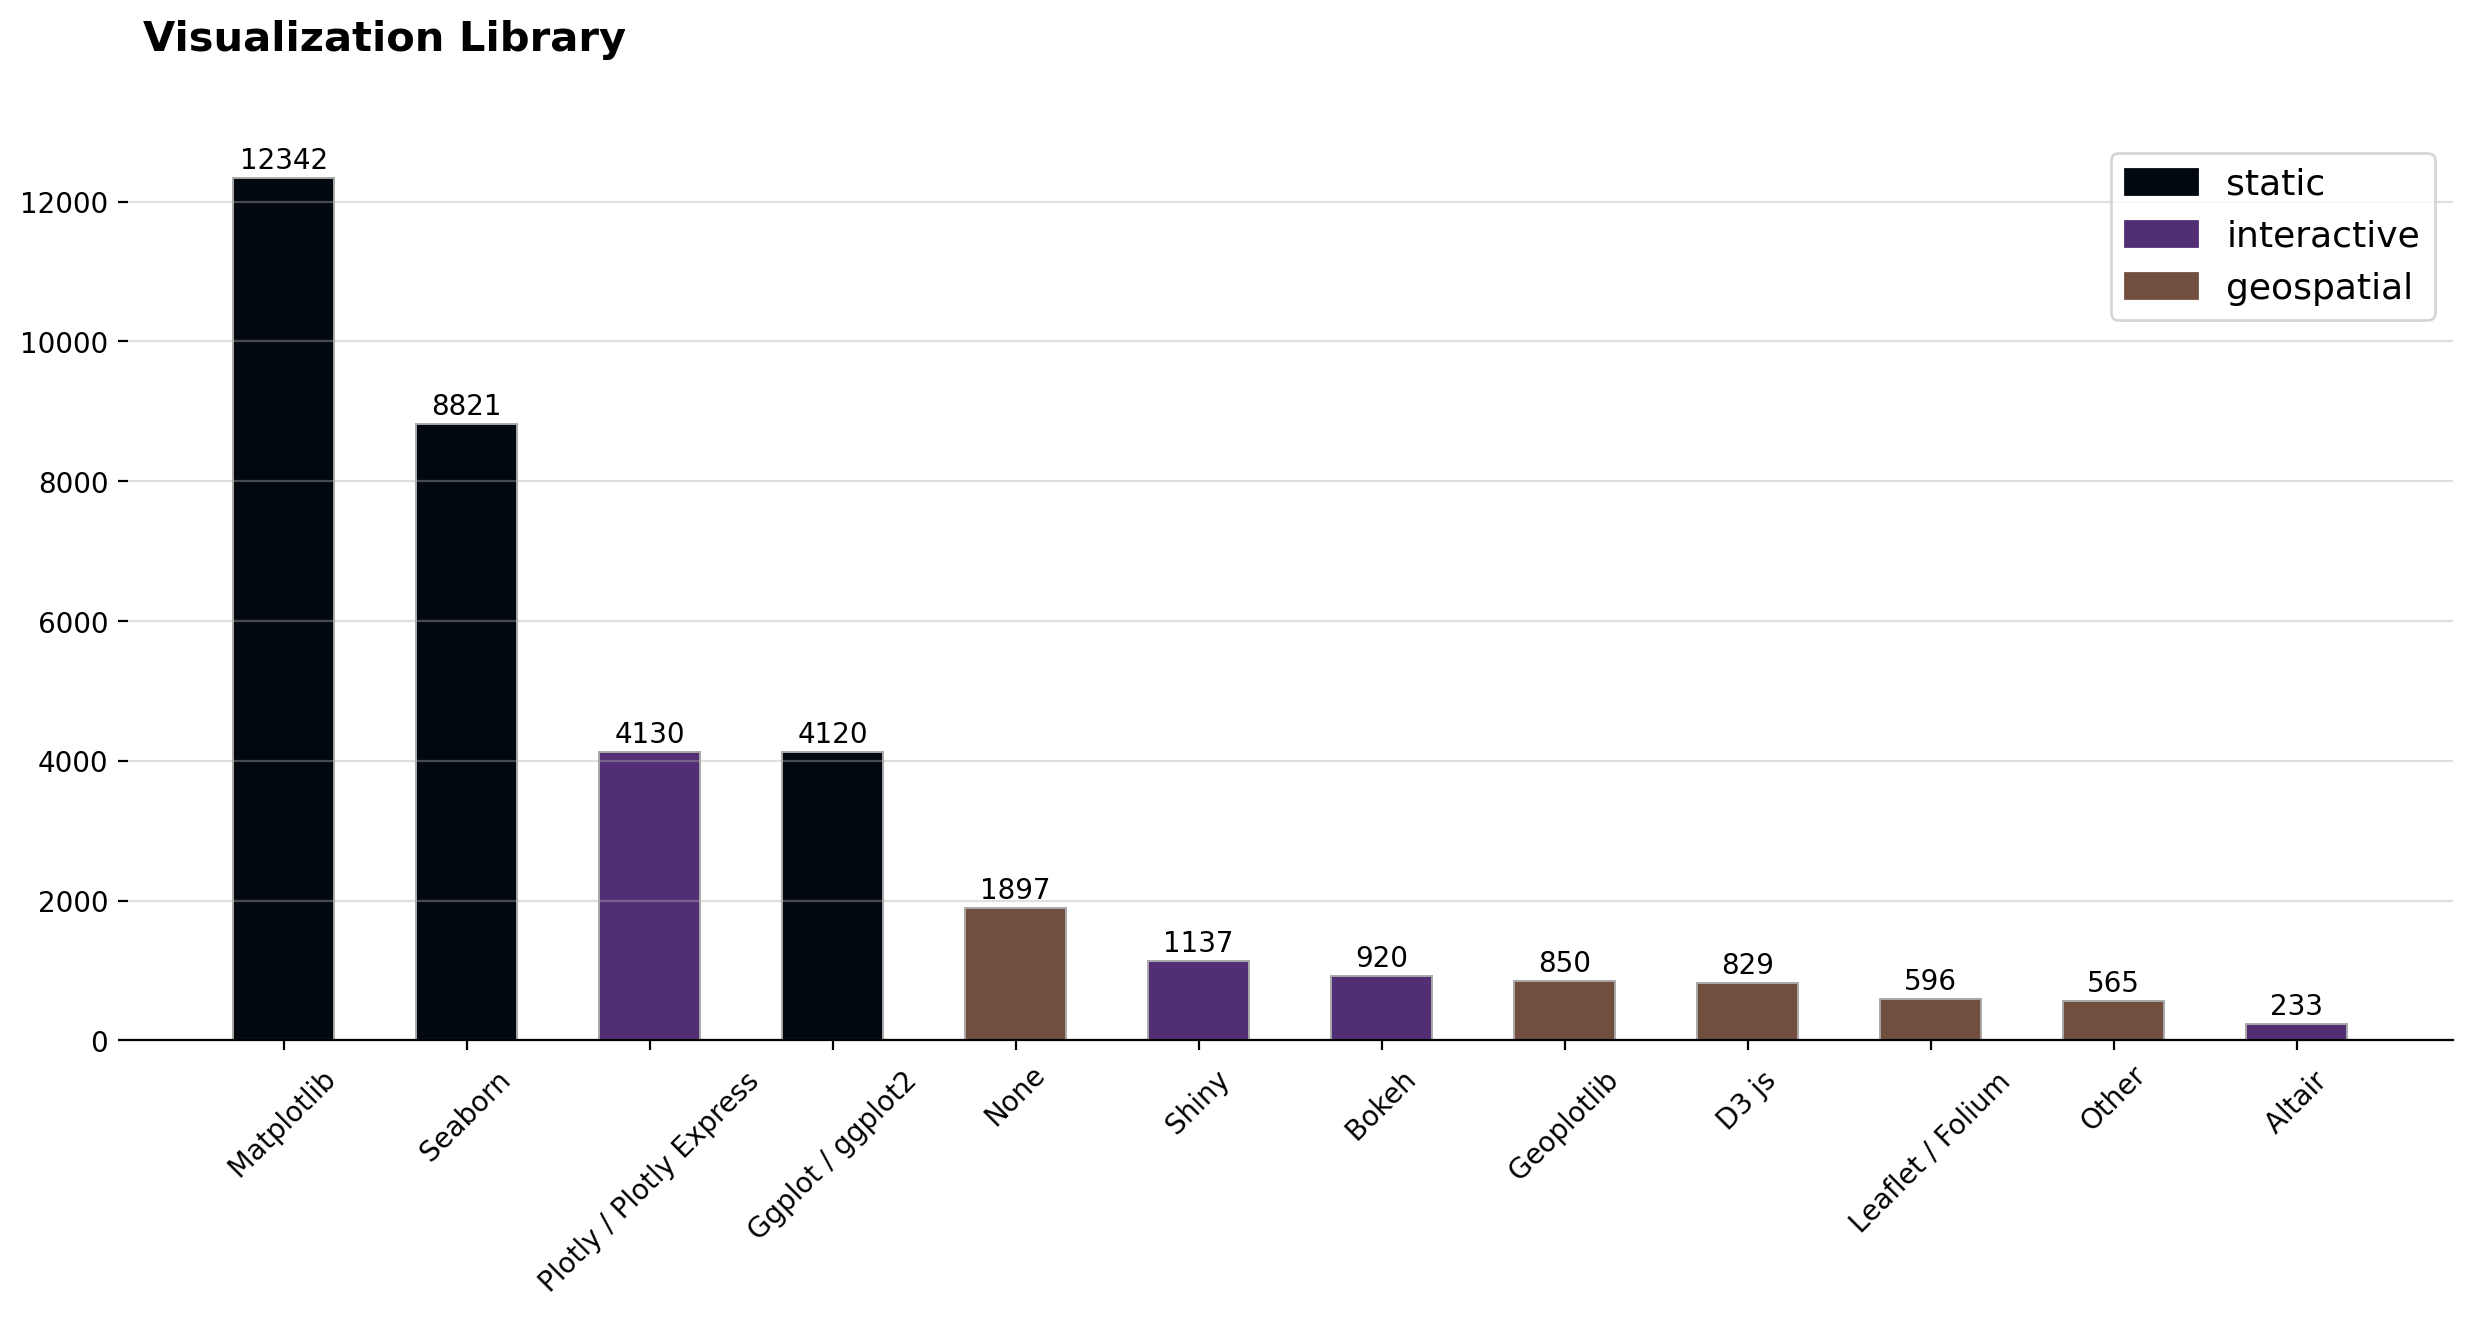

In [352]:
data_q14 = data.filter(regex = "^Q14")
data_q14_count = data_q14.describe().loc[["top","count"]].T.sort_values("count", ascending = False)
data_q14_count = data_q14_count.set_index('top')

#프로그램 종류에 따른 색상 지정
static = [' Matplotlib ', ' Seaborn ',' Ggplot / ggplot2 ']
interactive = [' Plotly / Plotly Express ',' Shiny ',' Altair ',' Bokeh ']
geo = ['None',' Geoplotlib ',' D3 js ', ' Leaflet / Folium ', 'Other']

data_q14_count["color"] = "lightgray"
data_q14_count.loc[data_q14_count.index.isin(static),"color"] = '#02080F'
data_q14_count.loc[data_q14_count.index.isin(interactive),"color"] = '#522e75'
data_q14_count.loc[data_q14_count.index.isin(geo),"color"] = '#714e3d'

fig,ax = plt.subplots(1,1,figsize = (15,6))

ax.bar(x = data_q14_count.index,
       height = data_q14_count["count"],
       width = 0.55,
       edgecolor = "darkgray",
       color = data_q14_count.color,
      linewidth = 0.7)

for i in data_q14_count.index:
    ax.annotate(s = f"{data_q14_count['count'][i]}",
                xy = (i, data_q14_count["count"][i]+250),
                va = 'center', ha = 'center', fontfamily = 'Sans Serif', fontweight = "light")
    
for s in ['top', 'left','right']:
    ax.spines[s].set_visible(False)
    
ax.set_xticklabels(data_q14_count.index, fontfamily = 'Sans Serif', fontweight = 'light', rotation = 45)
ax.grid(axis= 'y', ls = '-', alpha = 0.4)
fig.text(0.13,0.95,"Visualization Library", fontfamily = 'Sans Serif', fontsize = 15, fontweight = 'bold')

static = mpatches.Patch(color='#02080F', label='static')
interactive = mpatches.Patch(color='#522e75', label='interactive')
geo = mpatches.Patch(color='#714e3d', label='geospatial')

plt.legend(handles=[static, interactive, geo], fontsize=13) #handles을 반드시 기입해야 함
plt.show()